# **Credit Risk Analysis**

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# load the dataset
credit_df = pd.read_csv("/content/drive/MyDrive/Assignments/ML/Assignment2/credit_risk.csv")
credit_df.head(10)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
6,6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N,3
7,7,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4
8,8,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3


In [32]:
# check df shape
print("Shape of the dataset: ", credit_df.shape)

Shape of the dataset:  (32581, 12)


## Data Preprocessing

In [33]:
# check for null or missing values values in columns

credit_df.info()
print(credit_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB
Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status         

There are Null values present in the EMP_Length and Rate Column. The rate column has almost 10% values as null hence we can not drop such large number of rows. Trying to Impute te values

In [34]:
credit_df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [35]:
for column in credit_df.columns:
  zero_count = (credit_df[column]==0).sum()
  print(f"Number of zeros in {column}: {zero_count}")

Number of zeros in Id: 1
Number of zeros in Age: 0
Number of zeros in Income: 0
Number of zeros in Home: 0
Number of zeros in Emp_length: 4105
Number of zeros in Intent: 0
Number of zeros in Amount: 0
Number of zeros in Rate: 0
Number of zeros in Status: 25473
Number of zeros in Percent_income: 9
Number of zeros in Default: 0
Number of zeros in Cred_length: 0


There are multiple features that needs to be treated for missing values, outliers, and encoding of categorical features.

- Emp_length (2.5%) and Rate (9.5%) feature has missing values, we can drop the Emp_length rows with missing values and Rate column has approx 9.5% of missing values those should be imputed.
- Outliers exists in features like "Age", "Emp_length" those should be taken care
- And finally, standardizing and Normalizing the features as there are features with big variations


In [81]:
clean_df = credit_df.dropna(subset=['Emp_length'])
clean_df['Rate'] = clean_df['Rate'].fillna(clean_df['Rate'].mean())

print("\nDataFrame after dropping NaNs in 'Emp_length' and filling 'Rate' with the mean:")
clean_df.info()
print("\nUpdated DataFrame:")
print(clean_df)


DataFrame after dropping NaNs in 'Emp_length' and filling 'Rate' with the mean:
<class 'pandas.core.frame.DataFrame'>
Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              31686 non-null  int64  
 1   Age             31686 non-null  int64  
 2   Income          31686 non-null  int64  
 3   Home            31686 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          31686 non-null  object 
 6   Amount          31686 non-null  int64  
 7   Rate            31686 non-null  float64
 8   Status          31686 non-null  int64  
 9   Percent_income  31686 non-null  float64
 10  Default         31686 non-null  object 
 11  Cred_length     31686 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.1+ MB

Updated DataFrame:
          Id  Age  Income      Home  Emp_length           Intent  Amount  \
0          0   22   59000  

<ipython-input-81-79c8e556a360>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Rate'] = clean_df['Rate'].fillna(clean_df['Rate'].mean())


In [82]:
#Removing the ID column as its irrelevant for prediction model

clean_df = clean_df.drop(columns=['Id'])

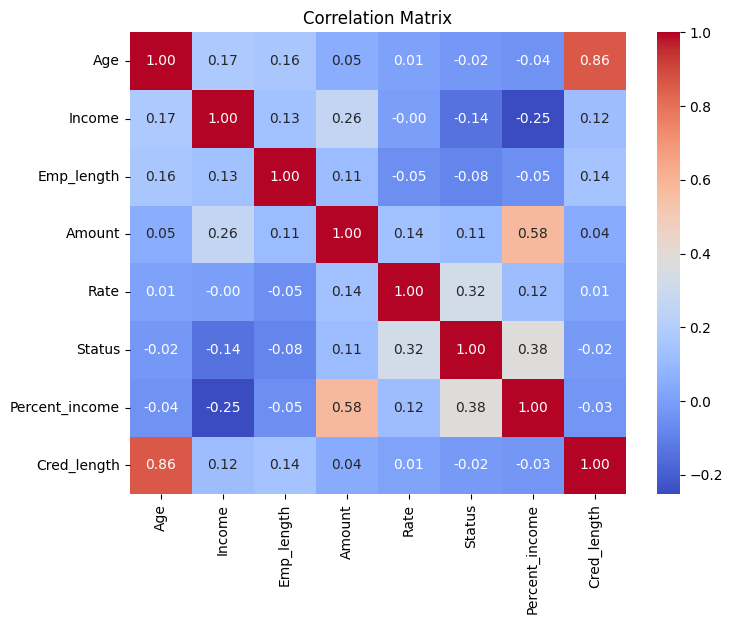

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
numerical_features = clean_df.select_dtypes(include=['number']).columns
numerical_df = clean_df[numerical_features]
corr_matrix = numerical_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [84]:
def detect_outliers_iqr(LR, column):
    Q1 = np.percentile(LR[column], 25)
    Q3 = np.percentile(LR[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return LR[(LR[column] < lower_bound) | (LR[column] > upper_bound)]

In [42]:
#Example to detect outliers in columns
# outliers_income = detect_outliers_iqr(clean_df, 'Income')
# outliers_Emplength = detect_outliers_iqr(clean_df,'Emp_length')
# outliers_Amount = detect_outliers_iqr(clean_df,'Amount')
# outliers_Rate = detect_outliers_iqr(clean_df,'Rate')
# outliers_Status = detect_outliers_iqr(clean_df,'Status')

# print(outliers_income)
# print(outliers_Emplength)
# print(outliers_Amount)
# print(outliers_Rate)
# print(outliers_Status)

       Age   Income      Home  Emp_length             Intent  Amount  \
15      23   500000  MORTGAGE         7.0  DEBTCONSOLIDATION   30000   
20      25   162500      RENT         2.0            VENTURE   35000   
33      25   306000      RENT         2.0  DEBTCONSOLIDATION   24250   
34      26   300000  MORTGAGE        10.0            MEDICAL    7800   
42      26   300000  MORTGAGE        10.0            VENTURE   20000   
...    ...      ...       ...         ...                ...     ...   
32544   58   780000  MORTGAGE         7.0           PERSONAL    4500   
32546   60  1900000  MORTGAGE         5.0           PERSONAL    1500   
32551   58   780000  MORTGAGE         7.0           PERSONAL    4500   
32562   61   160000  MORTGAGE        30.0           PERSONAL   24000   
32579   56   150000  MORTGAGE         5.0           PERSONAL   15000   

            Rate  Status  Percent_income  Default  Cred_length  
15     10.650000       0            0.06        0            3  
20   

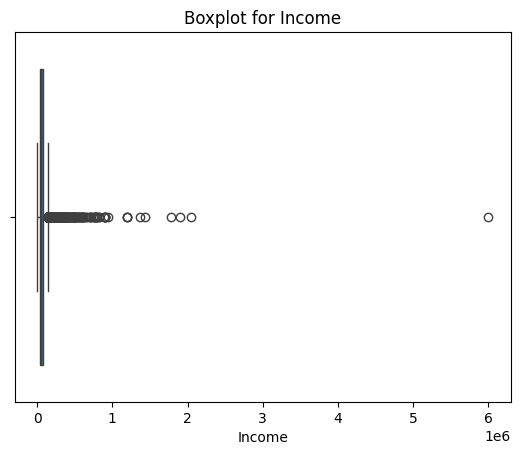

In [85]:
# Boxplot for visualizing outliers
sns.boxplot(x=clean_df['Income'])
plt.title('Boxplot for Income')
plt.show()

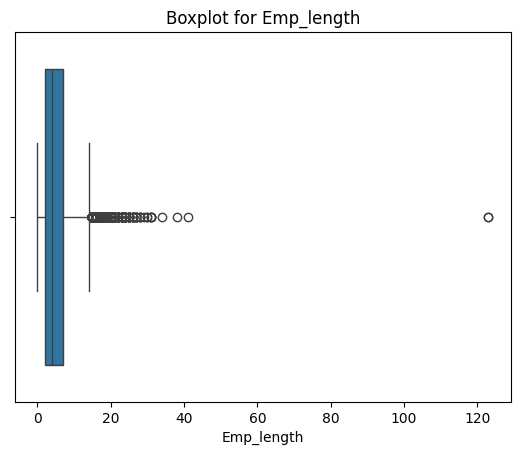

In [86]:
# Boxplot for visualizing outliers
sns.boxplot(x=clean_df['Emp_length'])
plt.title('Boxplot for Emp_length')
plt.show()

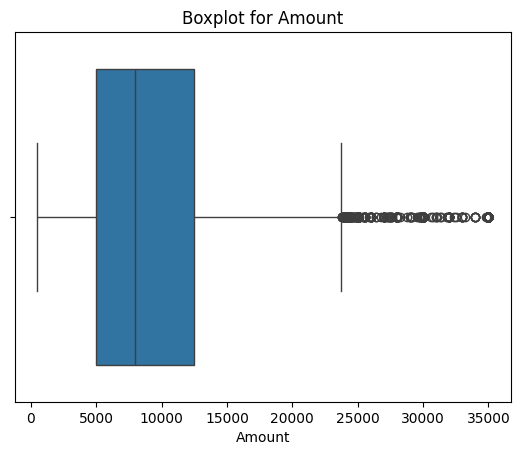

In [87]:
#
sns.boxplot(x=clean_df['Amount'])
plt.title('Boxplot for Amount')
plt.show()

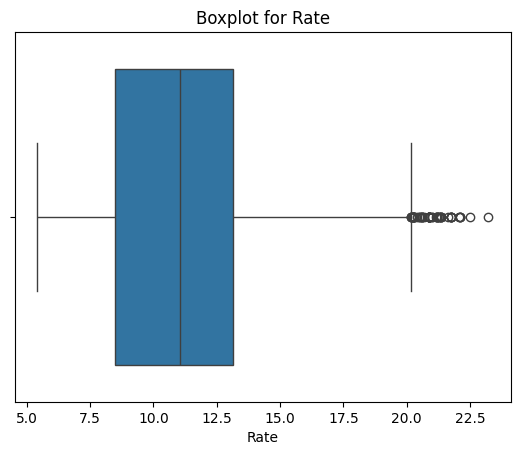

In [88]:
# Boxplot for visualizing outliers
sns.boxplot(x=clean_df['Rate'])
plt.title('Boxplot for Rate')
plt.show()

In [89]:
# Count values in 'Emp_length' and sort them
emp_length_counts = clean_df['Emp_length'].value_counts().sort_values(ascending=False)

print("Counts of Emp_length:\n", emp_length_counts)

Counts of Emp_length:
 Emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64


We can see the value of 123 with 2 value is not a valid Emp_length. Lets drop it from the dataset



In [90]:
# Removing rows where Emp_length is 123
clean_df = clean_df[clean_df['Emp_length'] != 123]

In [91]:
# Count values in 'Income' and sort them
income_counts = clean_df['Income'].value_counts().sort_values(ascending=False)

print("Counts of Income:\n", income_counts)

Counts of Income:
 Income
60000     1021
30000      810
50000      768
40000      648
45000      581
          ... 
97243        1
97800        1
115900       1
39240        1
720000       1
Name: count, Length: 4130, dtype: int64


In [92]:
# Imputing the Default column
clean_df['Default'] = clean_df['Default'].map({'Y': 1, 'N': 0})
clean_df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,1,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,0,2


In [99]:
# Define features and target variable
X = clean_df.drop('Default', axis=1)  # Assuming 'Default' is the target variable
y = clean_df['Default']

# Check the shape of features and target
print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Shape of features (X): (31684, 10)
Shape of target (y): (31684,)


In [100]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (25347, 10)
Testing set shape: (6337, 10)


In [101]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

print("\nModel training completed.")


Model training completed.


In [103]:
# Evaluate Performance
y_pred = model_pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5229
           1       0.49      0.40      0.44      1108

    accuracy                           0.82      6337
   macro avg       0.68      0.66      0.67      6337
weighted avg       0.81      0.82      0.81      6337

ROC AUC Score: 0.8765573726917297


In [104]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# Perform grid search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("\nBest ROC AUC Score from Grid Search:", grid_search.best_score_)


Best ROC AUC Score from Grid Search: 0.8831693365024179


In [105]:
import pickle

model_pkl_file = "credit_risk_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(best_model, file)